In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from scipy.stats import pearsonr

In [2]:
data = pd.read_excel(Path("..", "01_fit_natural_biotite", "Metapelite-Database_Bt_CLEAN_2024-02-03.xlsx"))

# calculate Fe2+ and Fe3+ content
data["Bt-Fe2+"] = (1 - data["Bt-XFe3+"]) * data["Bt-FeTot"]
data["Bt-Fe3+"] = data["Bt-XFe3+"] * data["Bt-FeTot"]

# calculate sum of di- and tri-valent cations
data["Bt-R2+"] = data["Bt-Mg"] + data["Bt-Mn"] + data["Bt-Fe2+"]
data["Bt-R3+"] = data["Bt-Al"] + data["Bt-Fe3+"]

In [3]:
data.keys()

Index(['Reference', 'Sequence locality', 'Bt-Si', 'Bt-Ti', 'Bt-Al', 'Bt-FeTot',
       'Bt-Mn', 'Bt-Mg', 'Bt-K', 'Bt-XMg_FeTot', 'Bt-XMg', 'Bt-XFe3+', 'MAS',
       'MAS #', 'Zone', 'Zone #', 'Qz', 'Pl', 'Ms', 'Pg', 'Mrg', 'Prl', 'Chl',
       'Cld', 'Bt', 'Grt', 'Crd', 'St', 'And', 'Ky', 'Sil', 'Kfs', 'Opx',
       'Crn', 'Spl', 'Gr', 'Ttn', 'Rt', 'Ilm', 'Mag', 'Hem', 'Sul', 'Po', 'Py',
       'Dol', 'Cal', 'Ep', 'Czo', 'Pressure estimate center',
       'Pressure estimate range', 'Pressure estimate random uniform',
       'Temperature estimate center', 'Temperature estimate range',
       'Temperature estimate random uniform', 'Temperature Ti-in-Bt',
       'Temperature random ordered after Ti-in-Bt', 'Sorting indices',
       'Bt-Fe2+', 'Bt-Fe3+', 'Bt-R2+', 'Bt-R3+'],
      dtype='object')

## **Biotite end-member** (Dubac & Forshaw, 2024 (in prep.)):

| End-member | Abbreviation | Formula |
|------------|----|-----------------------------|
| phlogopite | Phl | KMg3(Al,Si3)O10(OH)2 |
| annite | Ann | KFe2+3(Al,Si3)O10(OH)2 |
| eastonite | Eas | K(Mg2,Al)(Al2,Si2)O10(OH)2 |
| clintonite | Cln | Ca(Mg2,Al)(Al3,Si)O10(OH)2 |
| tetraferriannite | TFe3Ann | KFe2+3(Fe3+,Si3)O10(OH)2 |
| aspidolite | Asp | NaMg3(Al,Si3)O10(OH)2 |
| preisweirkite | Prw | Na(Mg2,Al)(Al2,Si2)O10(OH)2 |
| siderophyllite | Sid | K(Fe2+2,Al)(Al2,Si2)O10(OH)2 |
| Ti-rich, OH-free | Ti-OH | K(Mg2,Ti)(Al,Si3)O12 |
| ferrieastonite | Fe3Eas | K(Mg2,Fe3+)(Al2,Si2)O10(OH)2 |
| oxo-Al-biotite | OxoAlBt | K(Mg2,Al)(Al,Si3)O11(OH) |

In [4]:
# for each end-member create a df with compositional data
COLUMNS = ['Bt-Si', 'Bt-Ti', 'Bt-Al', 'Bt-Fe2', 'Bt-Fe3', 'Bt-Mn', 'Bt-Mg', 'Bt-K']

phlogopite = [3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 3.0, 1.0]
phlogopite = pd.DataFrame([phlogopite], columns=COLUMNS)

annite = [3.0, 0.0, 1.0, 3.0, 0.0, 0.0, 0.0, 1.0]
annite = pd.DataFrame([annite], columns=COLUMNS)

eastonite = [2.0, 0.0, 3.0, 0.0, 0.0, 0.0, 2.0, 1.0]
eastonite = pd.DataFrame([eastonite], columns=COLUMNS)

tetraferriannite = [3.0, 0.0, 0.0, 3.0, 1.0, 0.0, 0.0, 1.0]
tetraferriannite = pd.DataFrame([tetraferriannite], columns=COLUMNS)

siderophyllite = [2.0, 0.0, 3.0, 2.0, 0.0, 0.0, 0.0, 1.0]
siderophyllite = pd.DataFrame([siderophyllite], columns=COLUMNS)

ti_biotite = [3.0, 1.0, 1.0, 0.0, 0.0, 0.0, 2.0, 1.0]
ti_biotite = pd.DataFrame([ti_biotite], columns=COLUMNS)

ferrieastonite = [2.0, 0.0, 2.0, 0.0, 1.0, 0.0, 2.0, 1.0]
ferrieastonite = pd.DataFrame([ferrieastonite], columns=COLUMNS)

oxo_al_biotite = [3.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 1.0]
oxo_al_biotite = pd.DataFrame([oxo_al_biotite], columns=COLUMNS)

BIOTITE_ENDMEMBER = {"phlogopite": phlogopite,
                     "annite": annite,
                     "eastonite": eastonite,
                     "tetraferriannite": tetraferriannite,
                     "siderophyllite": siderophyllite,
                     "ti_biotite": ti_biotite,
                     "ferrieastonite": ferrieastonite,
                     "oxo_al_biotite": oxo_al_biotite}

# calculate XMg, XFe3+, Fe_tot, R2+ and R3+ for each end-member
for biotite in BIOTITE_ENDMEMBER.values():
    biotite['Bt-Fe_tot'] = biotite['Bt-Fe2'] + biotite['Bt-Fe3']
    biotite['Bt-XMg'] = biotite['Bt-Mg'] / (biotite['Bt-Mg'] + biotite['Bt-Fe2'])
    biotite['Bt-XFe3+'] = biotite['Bt-Fe3'] / (biotite['Bt-Fe2'] + biotite['Bt-Fe3'])
    biotite['Bt-XFe3+'] = biotite['Bt-XFe3+'].replace(np.nan, 0)
    biotite['Bt-R2+'] = biotite['Bt-Mg'] + biotite['Bt-Mn'] + biotite['Bt-Fe2']
    biotite['Bt-R3+'] = biotite['Bt-Al'] + biotite['Bt-Fe3']

/Users/philip/Research/Manuscripts/02_work_in_progress/2025_BtMLthermobarometry/code repo/ml-biotite-thermobarometry/.venv/lib/python3.11/site-packages/matplotlib/text.py:762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(x))
/Users/philip/Research/Manuscripts/02_work_in_progress/2025_BtMLthermobarometry/code repo/ml-biotite-thermobarometry/.venv/lib/python3.11/site-packages/matplotlib/text.py:763: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(y))
/Users/philip/Research/Manuscripts/02_work_in_progress/2025_BtMLthermobarometry/code repo/ml-biotite-thermobarometry/.venv/lib/python3.11/site-packages/matplotlib/text.py:905: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the futu

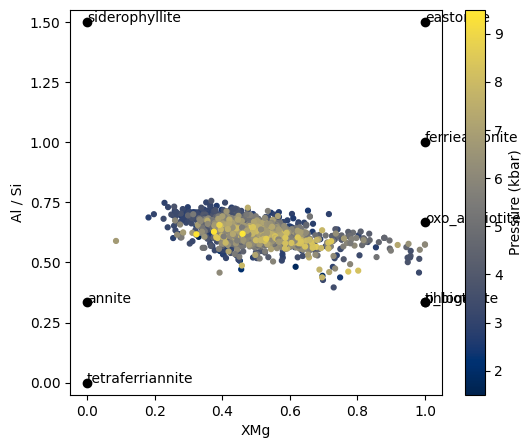

In [5]:
fig, ax = plt.subplots(figsize=(6, 5))

# ax.scatter(data["Bt-XMg"], data["Bt-Al"] / data["Bt-Si"], s=12, facecolors="lightgray", edgecolors="black")
cax = ax.scatter(data["Bt-XMg"], data["Bt-Al"] / data["Bt-Si"], s=12, c=data["Pressure estimate random uniform"], cmap="cividis")
for end_member, biotite in BIOTITE_ENDMEMBER.items():
    ax.scatter(biotite['Bt-XMg'], biotite['Bt-Al'] / biotite['Bt-Si'], c='black')
    ax.text(biotite['Bt-XMg'], biotite['Bt-Al'] / biotite['Bt-Si'], end_member)

ax.set_xlabel("XMg")
ax.set_ylabel("Al / Si")

ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.55)

ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5])

# add colorbar
cbar = fig.colorbar(cax, ax=ax, label="Pressure (kbar)")

# fig.savefig(Path("exported_figs", "XMg_vs_AlSi.pdf"), dpi=400)

Qunatify correlation

In [6]:
r = pearsonr(data["Pressure estimate random uniform"], data["Bt-Al"] / data["Bt-Si"])
r_ci = r.confidence_interval(0.95)

print(f"r: {r[0]:.2f}, 95% CI: {r_ci[0]:.2f} - {r_ci[1]:.2f}")

r: -0.28, 95% CI: -0.31 - -0.24


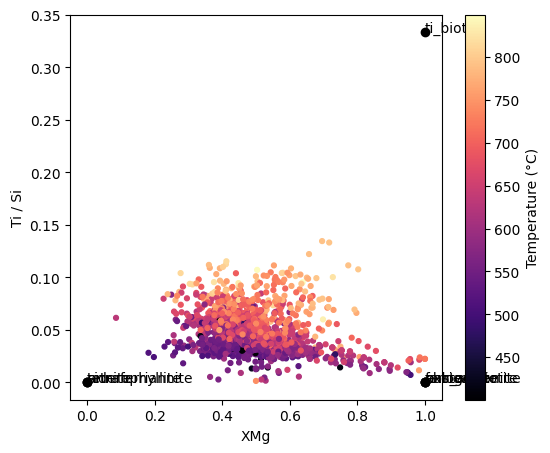

In [7]:
fig, ax = plt.subplots(figsize=(6, 5))

cax = ax.scatter(data["Bt-XMg"], data["Bt-Ti"] / data["Bt-Si"], c=data["Temperature random ordered after Ti-in-Bt"], cmap="magma", s=12)
for end_member, biotite in BIOTITE_ENDMEMBER.items():
    ax.scatter(biotite["Bt-XMg"], biotite['Bt-Ti'] / biotite['Bt-Si'], c='black')
    ax.text(biotite["Bt-XMg"], biotite['Bt-Ti'] / biotite['Bt-Si'], end_member)

ax.set_xlabel("XMg")
ax.set_ylabel("Ti / Si")

# add colorbar
cbar = fig.colorbar(cax, ax=ax, label="Temperature (°C)")

# fig.savefig(Path("exported_figs", "XMg_vs_TiSi.pdf"), dpi=400)

In [8]:
r = pearsonr(data["Temperature random ordered after Ti-in-Bt"], data["Bt-Ti"] / data["Bt-Si"])
r_ci = r.confidence_interval(0.95)

print(f"r2: {r[0]:.2f}, 95% CI: {r_ci[0]:.2f} - {r_ci[1]:.2f}")

r2: 0.71, 95% CI: 0.69 - 0.73


In [9]:
r = pearsonr(data["Temperature random ordered after Ti-in-Bt"], data["Bt-XMg"])
r_ci = r.confidence_interval(0.95)

print(f"r: {r[0]:.2f}, 95% CI: {r_ci[0]:.2f} - {r_ci[1]:.2f}")

r: 0.11, 95% CI: 0.07 - 0.16


In [10]:
r = pearsonr(data["Bt-Al"] / data["Bt-Si"], data["Bt-Ti"] / data["Bt-Si"])
r_ci = r.confidence_interval(0.95)

print(f"r2: {r[0]:.2f}, 95% CI: {r_ci[0]:.2f} - {r_ci[1]:.2f}")

r2: -0.16, 95% CI: -0.20 - -0.12


Text(0, 0.5, 'Mn [apfu]')

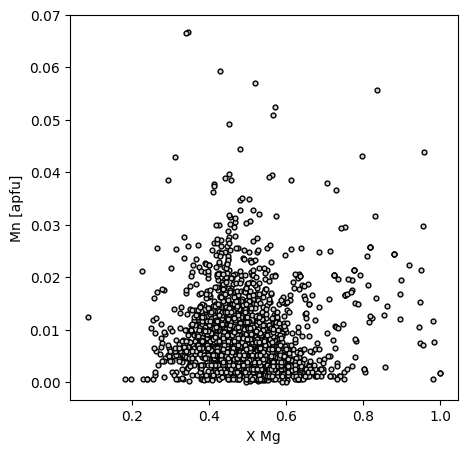

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(data["Bt-XMg"], data["Bt-Mn"], s=12, facecolors="lightgray", edgecolors="black")

ax.set_xlabel("X Mg")
ax.set_ylabel("Mn [apfu]")

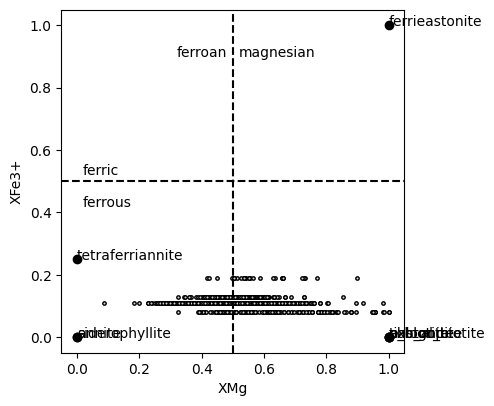

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(data["Bt-XMg"], data["Bt-XFe3+"], s=6, facecolors="lightgray", edgecolors="black")
for end_member, biotite in BIOTITE_ENDMEMBER.items():
    ax.scatter(biotite['Bt-XMg'], biotite['Bt-XFe3+'], c='black')
    ax.text(biotite['Bt-XMg'], biotite['Bt-XFe3+'], end_member)

ax.set_xlabel("XMg")
ax.set_ylabel("XFe3+")

ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)

# vertical line at XMg = 0.5
ax.axvline(0.5, color='black', linestyle='--')
ax.text(0.52, 0.9, "magnesian")
ax.text(0.32, 0.9, "ferroan")

# horizontal line at XFe3+ = 0.5
ax.axhline(0.5, color='black', linestyle='--')
ax.text(0.02, 0.52, "ferric")
ax.text(0.02, 0.42, "ferrous")

ax.set_aspect('equal')

fig.tight_layout()

# fig.savefig(Path("exported_figs", "XMg_vs_XFe3+.pdf"), dpi=400)